<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JulioOsvaldoHernandezBucio/blob/main/ActividadSemanal6_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Julio Osvaldo Hernandez Bucio. A01794366. ActividadSemanal6_Visualizacion. Dra. María de la Paz Rico Fernández. Ciencia y Analitica de datos. 27/10/22**

# **Obtención y limpieza de los datos**

In [109]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns
import matplotlib as mpl
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from numpy import linalg as LA

Obtención de la base de datos

In [110]:
input = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

Descripcion de la base de datos

Esta investigación apuntó al caso de los pagos predeterminados de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de incumplimiento entre seis métodos de minería de datos. Desde la perspectiva de la gestión de riesgos, el resultado de la precisión predictiva de la probabilidad de incumplimiento estimada será más valioso que el resultado binario de la clasificación: clientes creíbles o no creíbles. Debido a que se desconoce la probabilidad real de incumplimiento, este estudio presentó el novedoso "Método de suavizado de clasificación" para estimar la probabilidad real de incumplimiento. Con la probabilidad real de incumplimiento como variable de respuesta (Y) y la probabilidad predictiva de incumplimiento como variable independiente (X), el resultado de la regresión lineal simple (Y = A + BX) muestra que el modelo de pronóstico producido por la red neuronal artificial tiene el coeficiente de determinación más alto; su intersección de regresión (A) es cercana a cero y el coeficiente de regresión (B) a uno. Por lo tanto, entre las seis técnicas de minería de datos, la red neuronal artificial es la única que puede estimar con precisión la probabilidad real de incumplimiento.

In [111]:
df = pd.read_csv(input)
df.head(5)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [112]:
df.shape

(30000, 25)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [114]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [115]:
df.isnull().values.any()

True

In [116]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

Vemos que filas y columnas tienen datos que son vacios de X6 a X23 que son las colummnas que tienen los datos relevantes.

In [117]:
df1 = df[df.isnull().any(axis=1)]
df1.loc[:,'X6': 'X23']

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
18,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
38,1.0,-1.0,-1.0,-2.0,-2.0,-2.0,0.0,780.0,0.0,0.0,0.0,NaN,780.0,0.0,0.0,0.0,0.0,0.0
49,0.0,0.0,0.0,0.0,NaN,0.0,17447.0,18479.0,19476.0,19865.0,20480.0,20063.0,1318.0,1315.0,704.0,928.0,912.0,1069.0
64,-1.0,-1.0,-2.0,-2.0,-1.0,-1.0,99.0,0.0,0.0,0.0,2353.0,0.0,0.0,NaN,0.0,2353.0,0.0,0.0
160,2.0,2.0,2.0,NaN,2.0,0.0,24357.0,27453.0,26718.0,28168.0,27579.0,28321.0,3500.0,0.0,2200.0,NaN,1200.0,1250.0
173,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-709.0,-709.0,-709.0,-2898.0,-3272.0,-3272.0,0.0,0.0,0.0,NaN,0.0,0.0
175,1.0,2.0,2.0,2.0,2.0,3.0,64617.0,65978.0,67282.0,68557.0,NaN,71345.0,3000.0,3000.0,3000.0,5500.0,0.0,0.0
182,0.0,0.0,0.0,0.0,0.0,0.0,56422.0,110616.0,110340.0,122967.0,108834.0,70064.0,70010.0,30357.0,30000.0,20000.0,52183.0,20000.0
219,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1424.0,4542.0,126.0,0.0,0.0,0.0,4542.0,126.0,0.0,0.0,0.0,0.0
233,2.0,0.0,0.0,0.0,NaN,2.0,129801.0,131383.0,134379.0,142323.0,140120.0,150052.0,5000.0,5000.0,10000.0,0.0,12118.0,2769.0


Se eliminan las filas que contienen demasiados valores nulos con los que no se puede concluir nada de utilidad.

In [118]:
df = df.drop([df.index[18], df.index[38], df.index[6227], df.index[6232], df.index[24123], df.index[24365], df.index[29733], df.index[29734], df.index[29735], 
                     df.index[29824], df.index[29825], df.index[29832], 29833])
 
update_df = df[df.isnull().any(axis=1)]
update_df.loc[:,'X6': 'X23']

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
49,0.0,0.0,0.0,0.0,NaN,0.0,17447.0,18479.0,19476.0,19865.0,20480.0,20063.0,1318.0,1315.0,704.0,928.0,912.0,1069.0
64,-1.0,-1.0,-2.0,-2.0,-1.0,-1.0,99.0,0.0,0.0,0.0,2353.0,0.0,0.0,NaN,0.0,2353.0,0.0,0.0
160,2.0,2.0,2.0,NaN,2.0,0.0,24357.0,27453.0,26718.0,28168.0,27579.0,28321.0,3500.0,0.0,2200.0,NaN,1200.0,1250.0
173,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-709.0,-709.0,-709.0,-2898.0,-3272.0,-3272.0,0.0,0.0,0.0,NaN,0.0,0.0
175,1.0,2.0,2.0,2.0,2.0,3.0,64617.0,65978.0,67282.0,68557.0,NaN,71345.0,3000.0,3000.0,3000.0,5500.0,0.0,0.0
182,0.0,0.0,0.0,0.0,0.0,0.0,56422.0,110616.0,110340.0,122967.0,108834.0,70064.0,70010.0,30357.0,30000.0,20000.0,52183.0,20000.0
219,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,1424.0,4542.0,126.0,0.0,0.0,0.0,4542.0,126.0,0.0,0.0,0.0,0.0
233,2.0,0.0,0.0,0.0,NaN,2.0,129801.0,131383.0,134379.0,142323.0,140120.0,150052.0,5000.0,5000.0,10000.0,0.0,12118.0,2769.0
239,0.0,0.0,0.0,0.0,0.0,0.0,19346.0,21708.0,22940.0,19068.0,16409.0,16383.0,3000.0,2000.0,2198.0,1000.0,3000.0,2399.0
240,1.0,2.0,2.0,-2.0,-2.0,-1.0,21501.0,20650.0,0.0,0.0,NaN,2285.0,0.0,0.0,0.0,0.0,2285.0,0.0


Se procede a convertir los valores negativos a positivos en las columnas de Historial de Pago Pasado SOBRE el SUBDATAFRAME que contiene valores NULOS

In [119]:
for index, row in update_df.iterrows():
  for column in update_df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']]:
    if(not np.isnan(update_df[column][index]) and update_df[column][index] != 0 and update_df[column][index] != -1 and update_df[column][index] < 0):
      update_df.at[index, column] = update_df[column][index] * -1

Se procede a limpiar los valores de las columnas Importe del Pago  pasados SOBRE el SUBDATAFRAME que contiene valores NULOS.

Se tomo en cuenta el promedio de la columna para los pagos

In [120]:
for index, row in update_df.iterrows():
  mean = 0
  listColumnsNan = []
  for column in update_df[['X18', 'X19', 'X20', 'X21', 'X22', 'X23']]:
    if(np.isnan(update_df[column][index])):
      listColumnsNan.append(column)

  if(len(listColumnsNan) > 0):
    for column in listColumnsNan:
      update_df.at[index, column] = update_df[column].mean()

In [121]:
update_df.loc[:,'X6': 'X23']

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
49,0.0,0.0,0.0,0.0,NaN,0.0,17447.0,18479.0,19476.0,19865.0,20480.0,20063.0,1318.0,1315.000000,704.0,928.000000,912.000000,1069.00000
64,-1.0,-1.0,2.0,2.0,-1.0,-1.0,99.0,0.0,0.0,0.0,2353.0,0.0,0.0,3344.142857,0.0,2353.000000,0.000000,0.00000
160,2.0,2.0,2.0,NaN,2.0,0.0,24357.0,27453.0,26718.0,28168.0,27579.0,28321.0,3500.0,0.000000,2200.0,2490.153846,1200.000000,1250.00000
173,1.0,2.0,2.0,2.0,2.0,2.0,-709.0,-709.0,-709.0,-2898.0,-3272.0,-3272.0,0.0,0.000000,0.0,2490.153846,0.000000,0.00000
175,1.0,2.0,2.0,2.0,2.0,3.0,64617.0,65978.0,67282.0,68557.0,NaN,71345.0,3000.0,3000.000000,3000.0,5500.000000,0.000000,0.00000
182,0.0,0.0,0.0,0.0,0.0,0.0,56422.0,110616.0,110340.0,122967.0,108834.0,70064.0,70010.0,30357.000000,30000.0,20000.000000,52183.000000,20000.00000
219,-1.0,-1.0,-1.0,-1.0,2.0,2.0,1424.0,4542.0,126.0,0.0,0.0,0.0,4542.0,126.000000,0.0,0.000000,0.000000,0.00000
233,2.0,0.0,0.0,0.0,NaN,2.0,129801.0,131383.0,134379.0,142323.0,140120.0,150052.0,5000.0,5000.000000,10000.0,0.000000,12118.000000,2769.00000
239,0.0,0.0,0.0,0.0,0.0,0.0,19346.0,21708.0,22940.0,19068.0,16409.0,16383.0,3000.0,2000.000000,2198.0,1000.000000,3000.000000,2399.00000
240,1.0,2.0,2.0,2.0,2.0,-1.0,21501.0,20650.0,0.0,0.0,NaN,2285.0,0.0,0.000000,0.0,0.000000,2285.000000,0.00000


Se procede a limpiar los valores de las columnas de Historial de pagos pasados SOBRE el SUBDATAFRAME que contiene valores NULOS.

Se tomo en cuenta el promedio de la coumna de Historial de pagos pagos

In [122]:
for index, row in update_df.iterrows():
  mean = 0
  listColumnsNan = []
  for column in update_df[['X12', 'X13', 'X14', 'X15', 'X16', 'X17']]:
    if(np.isnan(update_df[column][index])):
      listColumnsNan.append(column)

  if(len(listColumnsNan) > 0):
    for column in listColumnsNan:
      update_df.at[index, column] = update_df[column].mean()

In [123]:
update_df.loc[:,'X6': 'X23']

,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
49,0.0,0.0,0.0,0.0,NaN,0.0,17447.0,18479.0,19476.00,19865.000000,20480.000000,20063.0,1318.0,1315.000000,704.0,928.000000,912.000000,1069.00000
64,-1.0,-1.0,2.0,2.0,-1.0,-1.0,99.0,0.0,0.00,0.000000,2353.000000,0.0,0.0,3344.142857,0.0,2353.000000,0.000000,0.00000
160,2.0,2.0,2.0,NaN,2.0,0.0,24357.0,27453.0,26718.00,28168.000000,27579.000000,28321.0,3500.0,0.000000,2200.0,2490.153846,1200.000000,1250.00000
173,1.0,2.0,2.0,2.0,2.0,2.0,-709.0,-709.0,-709.00,-2898.000000,-3272.000000,-3272.0,0.0,0.000000,0.0,2490.153846,0.000000,0.00000
175,1.0,2.0,2.0,2.0,2.0,3.0,64617.0,65978.0,67282.00,68557.000000,36399.291667,71345.0,3000.0,3000.000000,3000.0,5500.000000,0.000000,0.00000
182,0.0,0.0,0.0,0.0,0.0,0.0,56422.0,110616.0,110340.00,122967.000000,108834.000000,70064.0,70010.0,30357.000000,30000.0,20000.000000,52183.000000,20000.00000
219,-1.0,-1.0,-1.0,-1.0,2.0,2.0,1424.0,4542.0,126.00,0.000000,0.000000,0.0,4542.0,126.000000,0.0,0.000000,0.000000,0.00000
233,2.0,0.0,0.0,0.0,NaN,2.0,129801.0,131383.0,134379.00,142323.000000,140120.000000,150052.0,5000.0,5000.000000,10000.0,0.000000,12118.000000,2769.00000
239,0.0,0.0,0.0,0.0,0.0,0.0,19346.0,21708.0,22940.00,19068.000000,16409.000000,16383.0,3000.0,2000.000000,2198.0,1000.000000,3000.000000,2399.00000
240,1.0,2.0,2.0,2.0,2.0,-1.0,21501.0,20650.0,0.00,0.000000,36399.291667,2285.0,0.0,0.000000,0.0,0.000000,2285.000000,0.00000


Para limpiar los valores de las columnas de Historial de Pago Anterior se toma en cuenta la contraparte de las columnas de Pago Anterior.

In [124]:
for index, row in update_df.iterrows():
  mean = 0
  listColumnsNan = []
  for column in update_df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']]:
    if(np.isnan(update_df[column][index]) or update_df[column][index] == 0):
      listColumnsNan.append(column) #If row has NAN values on bill statement column we get that column
  
  #If has nan we get the mean of this values so we can replace it
  if(len(listColumnsNan) > 0):
    for column in listColumnsNan:
      columnPayMent = 'X' + str((12 + int(column[1:])))#We get the corresping month on Preovius Payment columns
      if(update_df[columnPayMent][index] != 0): #if there's a payment it means pay duly
        update_df.at[index,column] = -1
      else:
        update_df.at[index,column] = 1

Se copian los valores limpios del SubDataFrame al DataFrame original

In [125]:
for index, row in update_df.iterrows():
  for column in update_df.columns:
    df.at[index,column] = update_df[column][index]

Limpiamos los valores de las columnas de Historial de Pago Anterior se toma en cuenta la contraparte de las columnas de Pago Anterior.

In [126]:
for index, row in df.iterrows():
  mean = 0
  listColumnsNan = []
  for column in df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']]:
    if(df[column][index] == 0):
      listColumnsNan.append(column) #If row has 0 on bill statement value column we get that column
  
  #If has 0 we get the replace zero with default
  if(len(listColumnsNan) > 0):
    for column in listColumnsNan:
      columnPayMent = 'X' + str((12 + int(column[1:])))
      if(df[columnPayMent][index] != 0): #if there's a payment it means pay duly
        df.at[index,column] = -1
      else:
        df.at[index,column] = 1

DataFrame Limpio

In [127]:
df.head(100)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,-1.0,-1.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,-1.0,-1.0,-1.0,-1.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,-1.0,-1.0,-1.0,-1.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,-1.0,-1.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,98,150000,1.0,1.0,2.0,27.0,-1.0,-1.0,-1.0,-1.0,...,89775.0,87725.0,40788.0,4031.0,10006.0,3266.0,4040.0,1698.0,800.0,0.0
98,99,50000,2.0,3.0,1.0,22.0,-1.0,-1.0,-1.0,-1.0,...,13150.0,8866.0,7899.0,1411.0,1194.0,379.0,281.0,321.0,197.0,0.0
99,100,20000,1.0,2.0,1.0,38.0,-1.0,-1.0,-1.0,-1.0,...,18240.0,17928.0,150.0,1699.0,1460.0,626.0,1750.0,150.0,0.0,1.0
100,101,140000,1.0,1.0,2.0,32.0,-2.0,-2.0,-2.0,-2.0,...,415.0,100.0,1430.0,10212.0,850.0,415.0,100.0,1430.0,0.0,0.0


# **Normalizacion**

In [128]:
def normalize(x):
  min = np.min(x)
  max = np.max(x)
  range = max - min
  return [((a-min) / range).round(6) for a in x]

In [129]:
columns_name = ['ID', 'AMOUNT OF CREDIT', 'GENDER', 'EDUCATION', 'MARITAL STATUS', 'AGE', 
                'PAST PAYMENT 1', 'PAST PAYMENT 2', 'PAST PAYMENT 3', 'PAST PAYMENT 4', 'PAST PAYMENT 5', 'PAST PAYMENT 6',
                'BILL STATEMENT 1', 'BILL STATEMENT 2', 'BILL STATEMENT 3', 'BILL STATEMENT 4', 'BILL STATEMENT 5', 'BILL STATEMENT 6',
                'AMOUNT PAY 1', 'AMOUNT PAY 2', 'AMOUNT PAY 3', 'AMOUNT PAY 4', 'AMOUNT PAY 5', 'AMOUNT PAY 6', 'Y']
df.columns = columns_name
df.columns

Index(['ID', 'AMOUNT OF CREDIT', 'GENDER', 'EDUCATION', 'MARITAL STATUS',
       'AGE', 'PAST PAYMENT 1', 'PAST PAYMENT 2', 'PAST PAYMENT 3',
       'PAST PAYMENT 4', 'PAST PAYMENT 5', 'PAST PAYMENT 6',
       'BILL STATEMENT 1', 'BILL STATEMENT 2', 'BILL STATEMENT 3',
       'BILL STATEMENT 4', 'BILL STATEMENT 5', 'BILL STATEMENT 6',
       'AMOUNT PAY 1', 'AMOUNT PAY 2', 'AMOUNT PAY 3', 'AMOUNT PAY 4',
       'AMOUNT PAY 5', 'AMOUNT PAY 6', 'Y'],
      dtype='object')

In [130]:
df['PAST PAYMENT 1'] = normalize(df['PAST PAYMENT 1'])
df['PAST PAYMENT 2'] = normalize(df['PAST PAYMENT 2'])
df['PAST PAYMENT 3'] = normalize(df['PAST PAYMENT 3'])
df['PAST PAYMENT 4'] = normalize(df['PAST PAYMENT 4'])
df['PAST PAYMENT 5'] = normalize(df['PAST PAYMENT 5'])
df['PAST PAYMENT 6'] = normalize(df['PAST PAYMENT 6'])
df['BILL STATEMENT 1'] = normalize(df['BILL STATEMENT 1'])
df['BILL STATEMENT 2'] = normalize(df['BILL STATEMENT 2'])
df['BILL STATEMENT 3'] = normalize(df['BILL STATEMENT 3'])
df['BILL STATEMENT 4'] = normalize(df['BILL STATEMENT 4'])
df['BILL STATEMENT 5'] = normalize(df['BILL STATEMENT 5'])
df['BILL STATEMENT 6'] = normalize(df['BILL STATEMENT 6'])
df['AMOUNT PAY 1'] = normalize(df['AMOUNT PAY 1'])
df['AMOUNT PAY 2'] = normalize(df['AMOUNT PAY 2'])
df['AMOUNT PAY 3'] = normalize(df['AMOUNT PAY 3'])
df['AMOUNT PAY 4'] = normalize(df['AMOUNT PAY 4'])
df['AMOUNT PAY 5'] = normalize(df['AMOUNT PAY 5'])
df['AMOUNT PAY 6'] = normalize(df['AMOUNT PAY 6'])

# **Desviación Estandar**

La desviación estándar es una medida que se utiliza para cuantificar la cantidad de variación de un conjunto de valores de datos de su media. Una desviación estándar baja para una variable indica que los puntos de datos tienden a estar cerca de su media y viceversa. La siguiente línea de código imprime la desviación estándar de todas las variables numéricas en los datos.

In [131]:
df.mean()

ID                   14998.014740
AMOUNT OF CREDIT    167501.573348
GENDER                   1.603928
EDUCATION                1.853103
MARITAL STATUS           1.551939
AGE                     35.483658
PAST PAYMENT 1           0.150929
PAST PAYMENT 2           0.140888
PAST PAYMENT 3           0.138073
PAST PAYMENT 4           0.132387
PAST PAYMENT 5           0.128412
PAST PAYMENT 6           0.127875
BILL STATEMENT 1         0.191860
BILL STATEMENT 2         0.112906
BILL STATEMENT 3         0.112164
BILL STATEMENT 4         0.200904
BILL STATEMENT 5         0.120633
BILL STATEMENT 6         0.290860
AMOUNT PAY 1             0.006484
AMOUNT PAY 2             0.003517
AMOUNT PAY 3             0.005833
AMOUNT PAY 4             0.007774
AMOUNT PAY 5             0.011254
AMOUNT PAY 6             0.009869
Y                        0.221129
dtype: float64

While interpreting standard deviation values, it is important to understand them in conjunction with the mean. For example, in the above output, the standard deviation of the variable 'Income' is much higher than that of the variable 'Dependents'. However, the unit of these two variables is different and, therefore, comparing the dispersion of these two variables on the basis of standard deviation alone will be incorrect. This needs to be kept in mind.

In [132]:
df.std()

ID                    8657.838923
AMOUNT OF CREDIT    129735.686550
GENDER                   0.489088
EDUCATION                0.790373
MARITAL STATUS           0.521973
AGE                      9.218276
PAST PAYMENT 1           0.123028
PAST PAYMENT 2           0.127518
PAST PAYMENT 3           0.126492
PAST PAYMENT 4           0.122754
PAST PAYMENT 5           0.118630
PAST PAYMENT 6           0.119578
BILL STATEMENT 1         0.065169
BILL STATEMENT 2         0.067557
BILL STATEMENT 3         0.038082
BILL STATEMENT 4         0.060610
BILL STATEMENT 5         0.060293
BILL STATEMENT 6         0.045774
AMOUNT PAY 1             0.018963
AMOUNT PAY 2             0.013683
AMOUNT PAY 3             0.019653
AMOUNT PAY 4             0.025232
AMOUNT PAY 5             0.035827
AMOUNT PAY 6             0.033634
Y                        0.415014
dtype: float64

# **Interquartile Range (IQR)**

The Interquartile Range (IQR) is a measure of statistical dispersion, and is calculated as the difference between the upper quartile (75th percentile) and the lower quartile (25th percentile). The IQR is also a very important measure for identifying outliers and could be visualized using a boxplot.

We can also calculate the IQR using the 25th and 75th percentile values.

In [133]:
df.describe()

,ID,AMOUNT OF CREDIT,GENDER,EDUCATION,MARITAL STATUS,AGE,PAST PAYMENT 1,PAST PAYMENT 2,PAST PAYMENT 3,PAST PAYMENT 4,...,BILL STATEMENT 4,BILL STATEMENT 5,BILL STATEMENT 6,AMOUNT PAY 1,AMOUNT PAY 2,AMOUNT PAY 3,AMOUNT PAY 4,AMOUNT PAY 5,AMOUNT PAY 6,Y
count,29987.000000,29987.000000,29987.000000,29987.000000,29987.000000,29984.000000,29987.000000,29987.000000,29987.000000,29987.000000,...,29987.000000,29987.000000,29987.000000,29987.000000,29987.000000,29987.000000,29987.000000,29987.000000,29987.000000,29987.000000
mean,14998.014740,167501.573348,1.603928,1.853103,1.551939,35.483658,0.150929,0.140888,0.138073,0.132387,...,0.200904,0.120633,0.290860,0.006484,0.003517,0.005833,0.007774,0.011254,0.009869,0.221129
std,8657.838923,129735.686550,0.489088,0.790373,0.521973,9.218276,0.123028,0.127518,0.126492,0.122754,...,0.060610,0.060293,0.045774,0.018963,0.013683,0.019653,0.025232,0.035827,0.033634,0.415014
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7501.500000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.100000,0.100000,0.100000,0.100000,...,0.162332,0.082400,0.261944,0.001145,0.000496,0.000435,0.000479,0.000594,0.000223,0.000000
50%,14998.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.100000,0.100000,0.100000,0.100000,...,0.178087,0.098615,0.274102,0.002404,0.001193,0.002009,0.002415,0.003517,0.002837,0.000000
75%,22494.500000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.100000,0.100000,0.100000,0.100000,...,0.211532,0.130433,0.298805,0.005731,0.002969,0.005029,0.006464,0.009453,0.007566,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Scatter Plot

One way you can summarize the categorical data is by using the function value_counts(). We can change the name of the column to make it easier to read.

In [134]:
df.value_counts()

ID     AMOUNT OF CREDIT  GENDER  EDUCATION  MARITAL STATUS  AGE   PAST PAYMENT 1  PAST PAYMENT 2  PAST PAYMENT 3  PAST PAYMENT 4  PAST PAYMENT 5  PAST PAYMENT 6  BILL STATEMENT 1  BILL STATEMENT 2  BILL STATEMENT 3  BILL STATEMENT 4  BILL STATEMENT 5  BILL STATEMENT 6  AMOUNT PAY 1  AMOUNT PAY 2  AMOUNT PAY 3  AMOUNT PAY 4  AMOUNT PAY 5  AMOUNT PAY 6  Y  
1      20000             2.0     2.0        1.0             24.0  0.4             0.4             0.1             0.1             0.0             0.0             0.149982          0.069164          0.086723          0.160138          0.080648          0.260979          0.000000      0.000409      0.000000      0.000000      0.000000      0.000000      1.0    1
19993  240000            2.0     2.0        1.0             34.0  0.1             0.1             0.1             0.1             0.1             0.1             0.147073          0.068044          0.097732          0.180178          0.081529          0.261255          0.002199 

# **PCA**

In [135]:
pcs = PCA()
pcs.fit(df.iloc[:, 6:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                             'Proportion of variance': pcs.explained_variance_ratio_,
                             'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                             })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
Standard deviation,0.427058,0.217489,0.133480,0.115251,0.091574,0.076308,0.061709,0.048503,0.037744,0.033463,0.031975,0.024761,0.020910,0.018705,0.015576,0.011997,0.010438,0.008616,0.006169
Proportion of variance,0.636077,0.164973,0.062139,0.046326,0.029247,0.020308,0.013281,0.008205,0.004968,0.003905,0.003566,0.002138,0.001525,0.001220,0.000846,0.000502,0.000380,0.000259,0.000133
Cumulative proportion,0.636077,0.801050,0.863189,0.909516,0.938763,0.959071,0.972352,0.980557,0.985525,0.989431,0.992997,0.995135,0.996660,0.997880,0.998726,0.999228,0.999608,0.999867,1.000000


Los componentes principales son las combinaciones lineales de las variables originales que explican la varianza en los datos. El número máximo de componentes extraídos siempre es igual al número de variables. Los vectores propios, compuestos por los coeficientes que corresponden a cada variable, se utilizan para calcular las puntuaciones de los componentes principales. Los coeficientes indican la ponderación relativa de cada variable en el componente.

In [136]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 6:].columns
                                )
pcsComponents_df.iloc[:,:5]

,0,1,2,3,4
PAST PAYMENT 1,0.134941,0.287085,-0.045934,-0.528431,-0.562199
PAST PAYMENT 2,0.123365,0.403231,-0.024981,-0.501769,0.014229
PAST PAYMENT 3,0.113327,0.433933,-0.046155,-0.167108,0.582643
PAST PAYMENT 4,0.103960,0.428910,-0.047822,0.231043,0.349561
PAST PAYMENT 5,0.095176,0.406429,-0.027147,0.433201,-0.197403
PAST PAYMENT 6,0.087914,0.374750,-0.006277,0.443167,-0.425612
BILL STATEMENT 1,-0.001759,0.032651,0.458480,-0.025817,0.009841
BILL STATEMENT 2,-0.000707,0.038158,0.484205,-0.018379,0.020620
BILL STATEMENT 3,-0.000301,0.022854,0.269347,-0.003565,0.006895
BILL STATEMENT 4,0.000337,0.040208,0.432290,0.001186,-0.004215


In [137]:
pcsComponents_dfX = pd.DataFrame(pcs.components_.transpose(), 
                                columns = pcsSummary_df.columns,
                                index = df.iloc[:, 6:].columns
                                )
pcsComponents_dfX

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
PAST PAYMENT 1,0.134941,0.287085,-0.045934,-0.528431,-0.562199,-0.436577,-0.318834,-0.095841,0.016355,0.012154,-0.000256,0.006205,0.006441,0.003974,0.001125,0.000418,-0.000381,-0.001219,0.000620
PAST PAYMENT 2,0.123365,0.403231,-0.024981,-0.501769,0.014229,0.418788,0.580217,0.238110,0.002899,-0.012210,0.012209,-0.002478,0.018533,-0.013114,-0.002291,-0.003320,0.002243,0.001890,-0.001668
PAST PAYMENT 3,0.113327,0.433933,-0.046155,-0.167108,0.582643,0.212290,-0.476647,-0.395206,0.012238,-0.003768,-0.003928,-0.005612,-0.015447,0.014818,0.013162,0.004436,-0.004091,-0.002027,0.000871
PAST PAYMENT 4,0.103960,0.428910,-0.047822,0.231043,0.349561,-0.573534,0.060187,0.542086,-0.011901,0.004343,0.016584,0.012620,0.009059,0.008891,-0.012495,-0.003576,-0.001834,0.004410,0.000334
PAST PAYMENT 5,0.095176,0.406429,-0.027147,0.433201,-0.197403,-0.157565,0.441553,-0.613485,0.028442,-0.008140,-0.030747,0.012687,-0.008427,-0.011120,0.004027,0.005303,0.002124,-0.002005,-0.000042
PAST PAYMENT 6,0.087914,0.374750,-0.006277,0.443167,-0.425612,0.483244,-0.366074,0.322799,-0.014910,0.046188,0.000114,-0.006218,0.008229,0.006795,0.001485,-0.002138,0.000283,-0.001581,-0.000091
BILL STATEMENT 1,-0.001759,0.032651,0.458480,-0.025817,0.009841,-0.013387,0.019380,-0.001603,-0.192055,0.406594,-0.255095,0.237533,-0.192598,0.370638,0.088630,0.312665,-0.420953,-0.055039,-0.058265
BILL STATEMENT 2,-0.000707,0.038158,0.484205,-0.018379,0.020620,-0.016174,-0.007564,-0.020317,-0.183370,0.316348,-0.183538,0.107094,0.269110,-0.229690,-0.272103,-0.220179,0.493799,0.103772,0.285370
BILL STATEMENT 3,-0.000301,0.022854,0.269347,-0.003565,0.006895,-0.017053,-0.005327,0.003304,-0.030225,0.038434,-0.016993,-0.106369,0.098764,-0.249574,0.532565,0.007070,0.245233,0.013262,-0.704637
BILL STATEMENT 4,0.000337,0.040208,0.432290,0.001186,-0.004215,-0.018619,-0.001058,-0.008090,0.012312,-0.216125,0.168358,-0.399599,0.137773,0.188174,0.187385,-0.518643,-0.297192,-0.304921,0.190779


En estos resultados, el segundo componente principal tiene asociaciones positivas grandes con el el estado de pago de julio a abril(X6-X11), y los primeros meses para el estado de cuenta. Se puede interpretar este componente principalmente como una medición de la estabilidad financiera a largo plazo del cliente. El tercer componente tiene asociaciones positivas grandes con los estados de cuenta, así que este componente mide principalmente el balance financiero del cliente .

# **Visualizacion de datos**

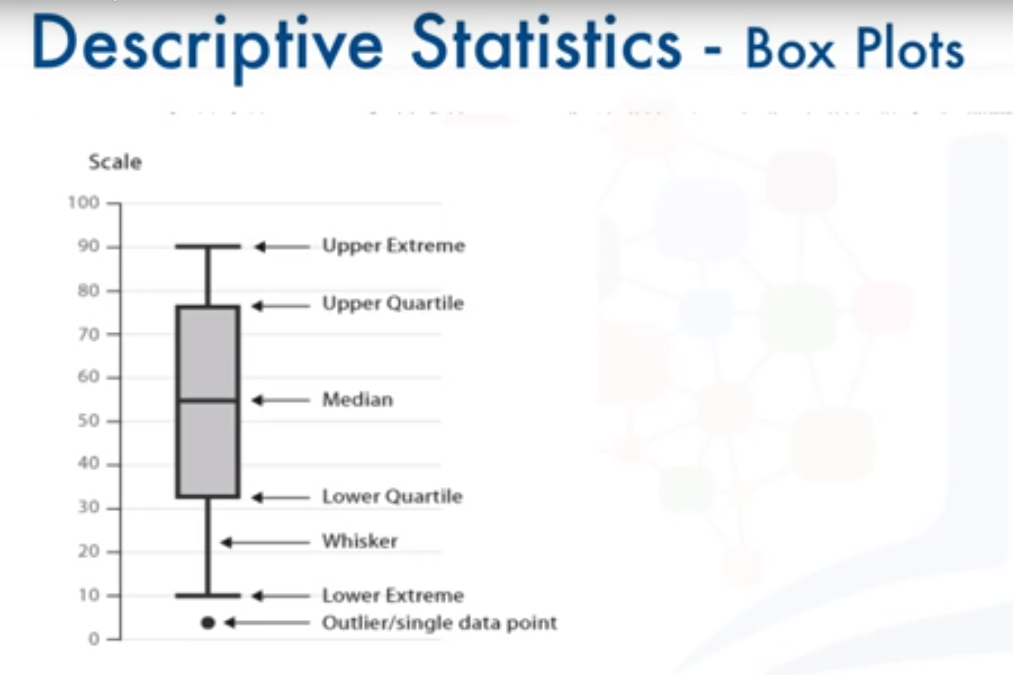

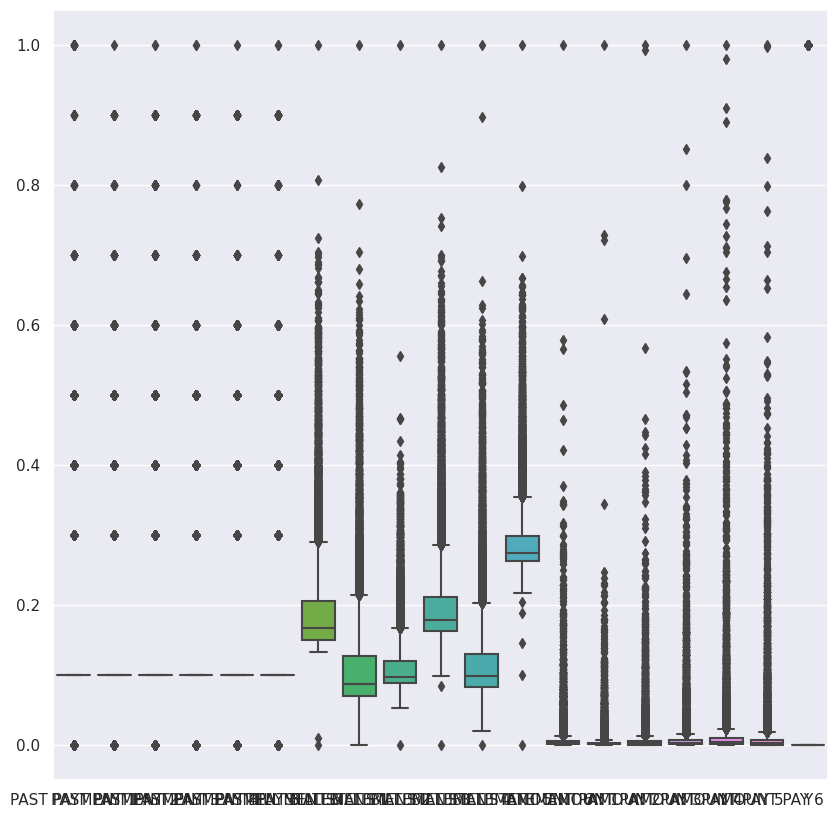

In [138]:
sns.boxplot(data=df.iloc[:, 6:].dropna(axis=0)) 

En los diagramas anteriores podemos ver que existen muchos Outliers para todos los datos.

Un valor atípico (Outlier) es una observación que está numéricamente distante del resto de los datos. Una opcion seria eliminar y filtrar todos estos outliers pero en esta actividad no tendremos ese alcance.

La principal conclusion que podemos sustraer de esta grafica esque nos debemos de enfocar en las columnas de BILL STATEMENT las cuales representan una mayor descripcion de los datos.

Ahora observaremos a traves de un HeatMap la corralacion entre estas columnas

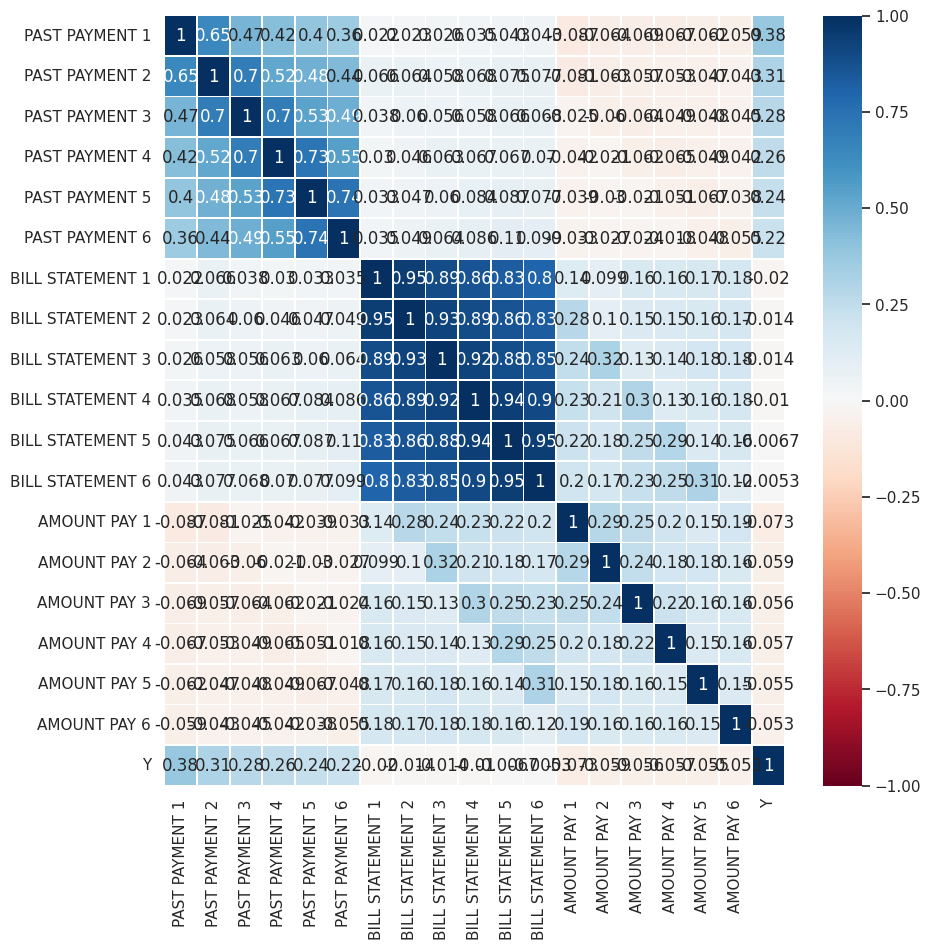

In [139]:
ndf = df.iloc[:, 6:]

corrs = ndf.corr()

sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "RdBu", annot= True, linewidths=0.5)

Para el HeatMap cada cuadrado muestra la correlación entre las variables en cada eje. 

Cuanto más cercana a 1 es la correlación, más positivamente correlacionados están; es decir, a medida que uno aumenta, también lo hace el otro y cuanto más cerca de 1, más fuerte es esta relación. Una correlación más cercana a -1 es similar, pero en lugar de que ambas aumenten, una variable disminuirá a medida que aumenta la otra.

Se puede observar que las diagonales son todas 1/azul oscuro, porque esos cuadrados correlacionan cada variable consigo misma (por lo que es una correlación perfecta).

Como en la grafica del BOXPLOT podemos observar que las columnas de BILLSTATEMENT proporcionan informacion relevante, teniendo correlacion con sus predecesores y sucesores, no podemos ignorar tambien las correlaciones significantes de las columnas de PAST PAYMENT. 

Procederemos a graficar una grafica de regresion lineal de las correalciones mas fuertes que pueden ser vistas en el HEATMAP: BILL STATEMENT 1 y BILL STATEMENT 2.

El objetivo principal de este gráfico es ver si el estado de cuenta 1 tiene algún impacto en estado de cuenta 2.

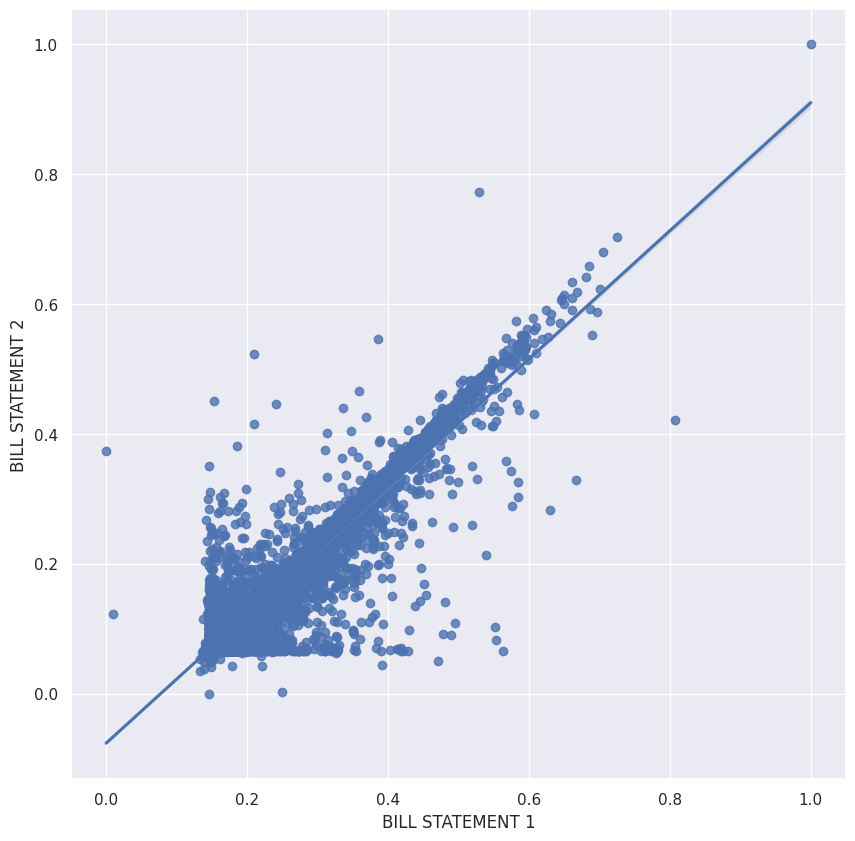

In [107]:
p = sns.regplot(data = df,
                x = df['BILL STATEMENT 1'],
                y = df['BILL STATEMENT 2'])
p

Se puede observar que la línea recta a través de los puntos de datos es muy empinada, lo que muestra que existe una relación lineal positiva entre las dos variables.

Para los datos menos correlacionados podemos graficar como en el paso anterior

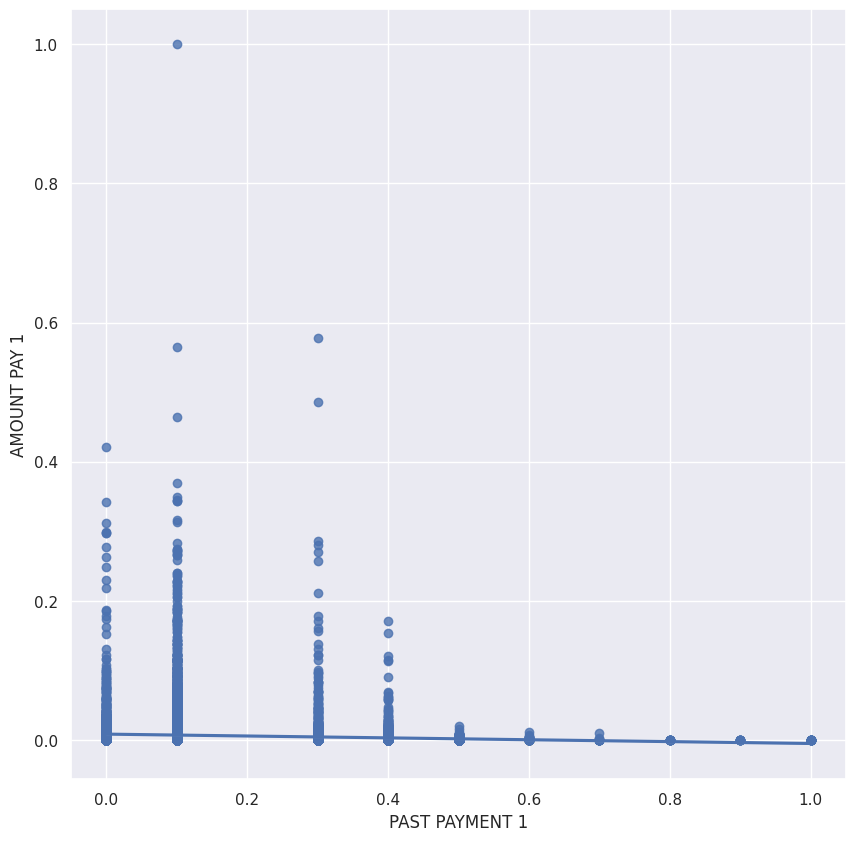

In [108]:
p = sns.regplot(data = df,
                x = df['PAST PAYMENT 1'],
                y = df['AMOUNT PAY 1'])
p

Estos datos no pueden usarse para predecir nada de utilidad

Grafiquemos los datos antes y después de la transformación PCA

In [ ]:
scaler = StandardScaler()
scaler.fit(df.iloc[:, 6:].dropna(axis=0))
X = scaler.transform(df.iloc[:, 6:].dropna(axis=0))

In [ ]:
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

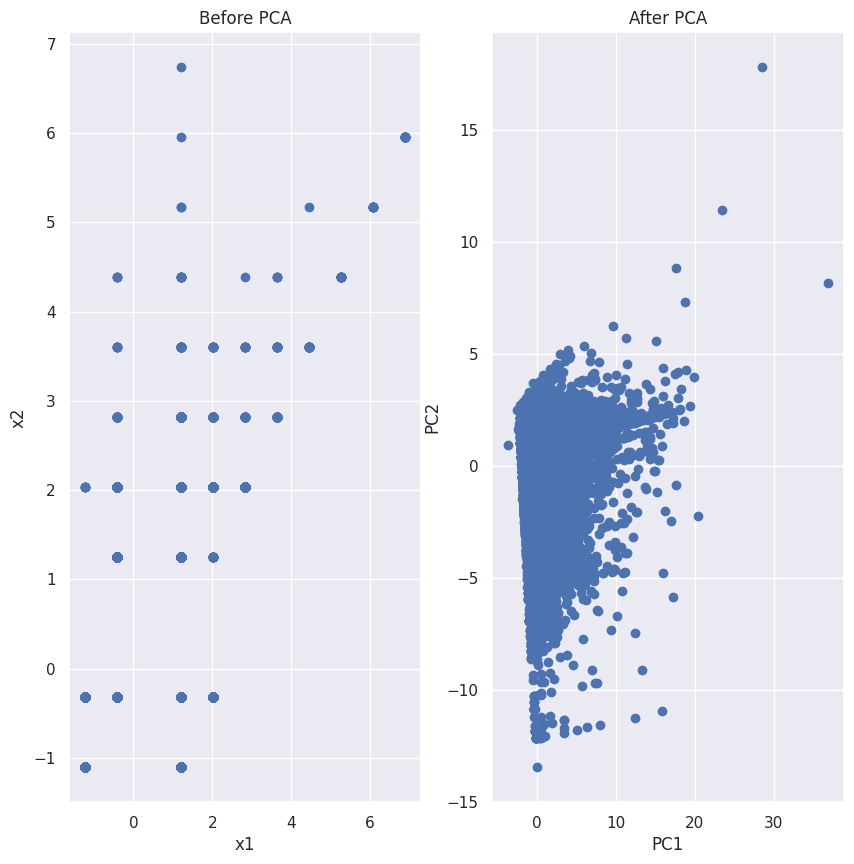

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1])
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1])
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Podemos ver que en el espacio PCA, la varianza se maximiza a lo largo de PC1 (explica el 30 % de la varianza) y PC2 tiene en su mayoria una tendencia negativa lo que explica el 20 % de la varianza en su eje positivo. Juntos, explican el 50%.

In [ ]:
print(pca.explained_variance_ratio_)

[0.30583642 0.20739915]


In [ ]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

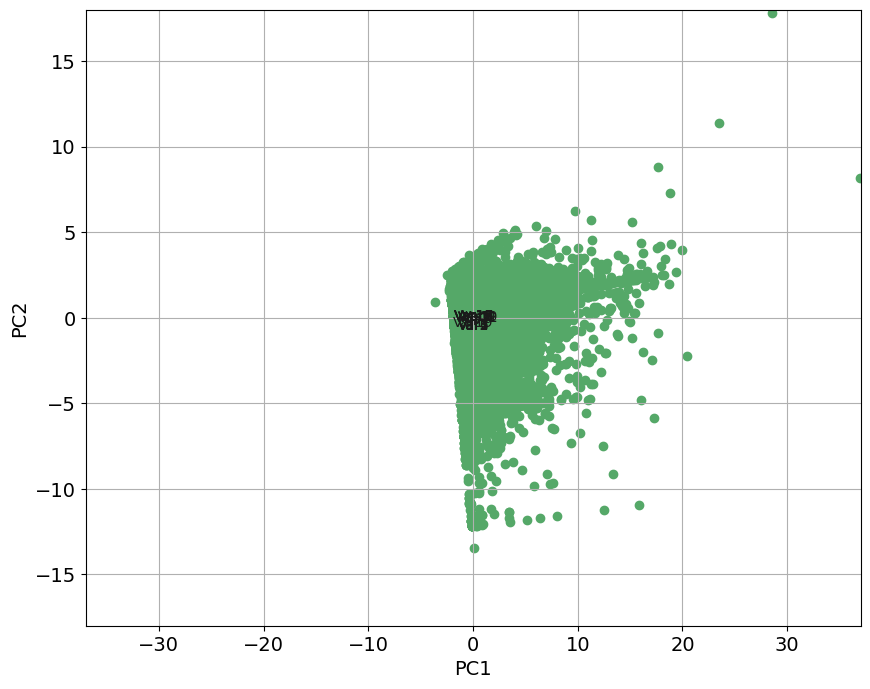

In [58]:
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style

scaler = StandardScaler()
scaler.fit(df.iloc[:, 6:].dropna(axis=0))
X = scaler.transform(df.iloc[:, 6:].dropna(axis=0))

pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y=1)
plt.show()

De nuevo podemos verificar visualmente que a) para PC1 la varianza se maximiza en un 30% b) la varianza se minimiza para PC2.

Además, las flechas (variables/características) que apuntan en la misma dirección indican correlación entre las variables que representan. Como las flechas son casi imperceptibles podemos concluir que las columnas estan altamente correlacionadas

Como toma de decisiones podriamos reducir las columnas agrupando una media para Historial de Pago y Pago anterior en una sola columna respectivamente.